# Common UK birds multiclass classification

## Introduction
This project aims to develop a machine learning algorithm that is capable of classifying images of birds that are commonly found in the UK with great accuracy. The algorithm uses a multi-class classification approach to identify and categorize bird species based on visual features extracted from the images.

## Dataset
There are 5 different species the model can classify, each class contains roughly 1000 images.
The dataset used was gathered using online image dataset libraries such as images.cv and the python library 'bing_image_installer', which automates the process of collecting bird images from the Bing search engine. After data collection was finished, all images were rezised to a uniform pixel size of 128x128.

## Architecture
This project adopts a Convolutional Neural Network as the model architecture due to its success in image classification tasks. 

To see required libraries refer to the bottom markdown cell.



### Importing necessary libraries

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import BatchNormalization, Conv2D, MaxPooling2D, Dense, Flatten
from keras.utils import normalize, img_to_array, to_categorical, load_img

### Establishing hyperperameters

In [28]:
dataset_path = "BirdImages/" #Setting dataset directory
class_names = ['GoldFinch', 'Magpie', 'Robin', 'Sparrow', 'Swan'] #Used for prediction plotting 
batch_size = 64 #Number of samples processed in one batch
image_size = (128, 128) #Image size in pixels

# Initialize lists to store data and labels
data = [] #List to store preprocessed image arrays
labels = [] #List to store numeric labels for each image. For example a value of [1,0,0,0,0] would be a 'GoldFinch'

### Loading and preprocessing dataset images

In [3]:
# Load class names
class_folders = os.listdir(dataset_path)  # Subfolders are class names
class_labels = {class_name: idx for idx, class_name in enumerate(class_folders)} #Class names dictionary

# Loop through each class folder
for class_name in class_folders:
    class_folder = os.path.join(dataset_path, class_name)
    
    # Ensuring item is a directory
    if os.path.isdir(class_folder):
        for image_file in os.listdir(class_folder):
            image_path = os.path.join(class_folder, image_file) #Creating path to image file
            
            # Load the image and preprocess
            img = load_img(image_path, target_size=image_size)  # Resizing to 128x128 pixels
            img_array = img_to_array(img) / 255.0  # Normalize pixel values to [0, 1]
            data.append(img_array) #Appends the preprocessed images to the 'data' list
            
            # Append the label using class_labels dictionary
            labels.append(class_labels[class_name])


### Converting the data and label

In [4]:
# Convert data and labels to numpy arrays
data = np.array(data)
labels = np.array(labels)

# One-hot encode labels for multiclass classification
labels = to_categorical(labels, num_classes=len(class_names))

### Splitting the dataset

In [5]:
from sklearn.model_selection import train_test_split

#Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

#Exploring the shape of the training and testing datasets
print("Exploring the X train dataset: ",X_train.shape)
print("Exploring the Y train dataset: ",y_train.shape)
print("Exploring the X test dataset: ",X_test.shape)
print("Exploring the Y test dataset: ",y_test.shape)

Exploring the X train dataset:  (4217, 128, 128, 3)
Exploring the Y train dataset:  (4217, 5)
Exploring the X test dataset:  (1055, 128, 128, 3)
Exploring the Y test dataset:  (1055, 5)


### Visualise the dataset

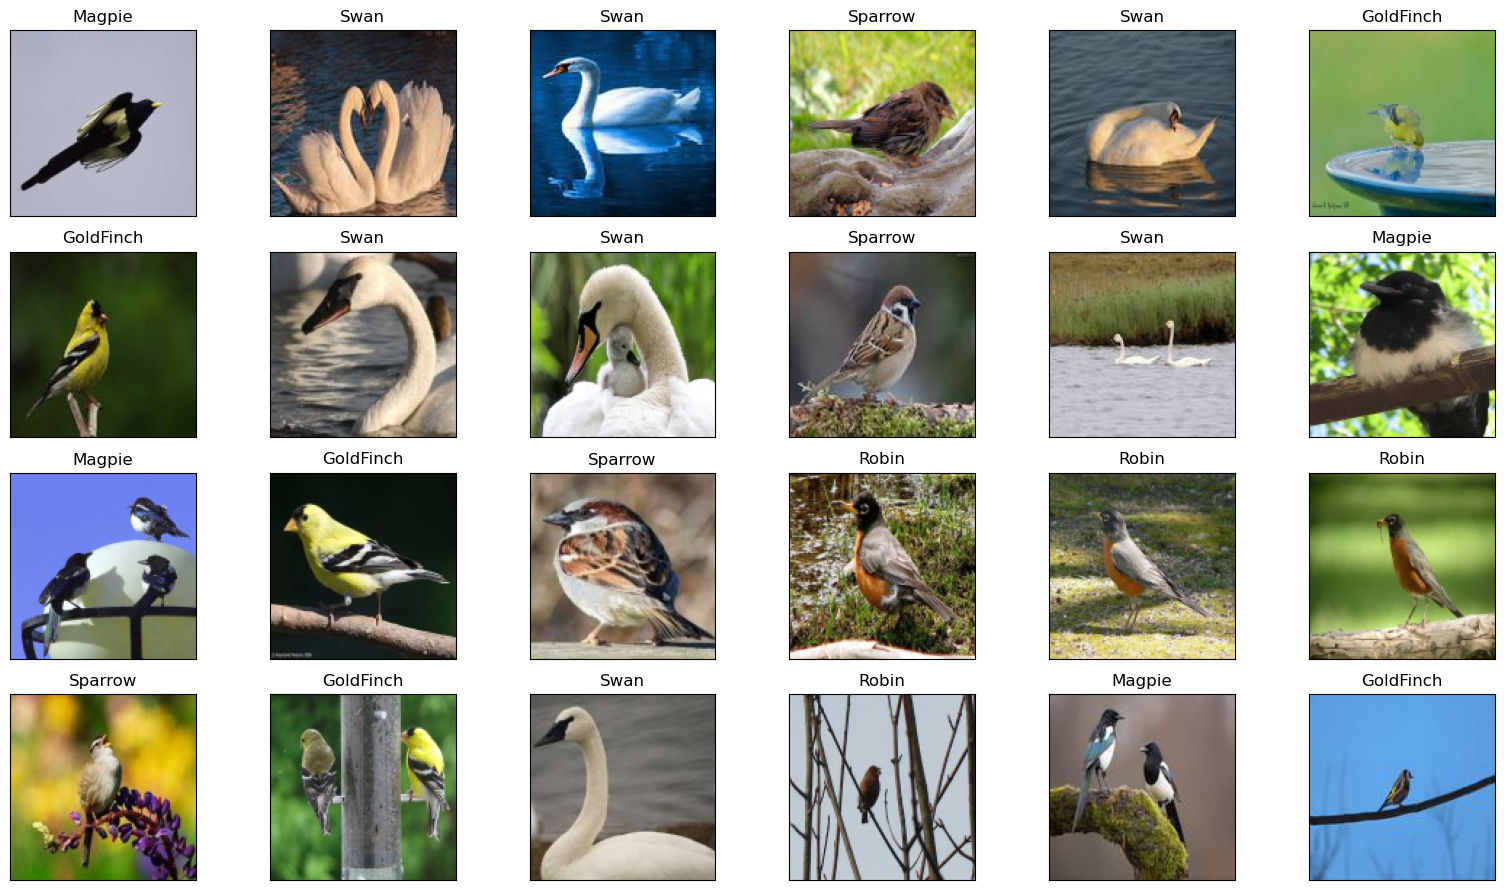

In [6]:
index = np.random.choice(np.arange(len(X_train)), 24, replace=False) #Select 24 random images to visualise
figure, axes = plt.subplots(nrows=4, ncols=6, figsize=(16, 9)) #Create a 4x6 grid to display images

for item in zip(axes.ravel(), X_train[index], y_train[index]):
    axes, image, target = item
    axes.imshow(image) #Displays image in each subplot
    axes.set_xticks([])  # Remove x-axis tick marks
    axes.set_yticks([])  # Remove y-axis tick marks
    
    # Convert one-hot encoded target back to class name
    target_idx = np.argmax(target)  # Find the index of the 1 in the one-hot vector
    bird_name = class_names[target_idx]  # Get the corresponding class name
    
    axes.set_title(bird_name)  # Set the title as the bird name

plt.tight_layout() #Adjust spacing between subplots
plt.show() #Display grid

### Data augmentation

Data augmentation will be used to improve the quality and quantity of training data used for the model. By flipping, zooming, cropping, etc. This will help the model by preventing overfitting and improve generalisation thanks to a bigger treaining dataset

In [ ]:
#Augmenting the data
train_datagen = ImageDataGenerator(
    rotation_range=40, #Rotates image
    width_shift_range=0.2, #Shifts image horizontally by up to 20%
    height_shift_range=0.2, #Shifts image vertically by up to 20%
    shear_range=0.2, #Adds distortion to the image
    zoom_range=0.2, #Zooms into the image by up to 20%
    horizontal_flip=True, #Flips the image left or right
    fill_mode='nearest') #Fills missing pixels after image transformation
#Fits augmented data to the training data
train_datagen.fit(X_train)

#Generate augmented images in batches
train_generator = train_datagen.flow(
    X_train,
    y_train,
    batch_size = batch_size)

### Visualise augmented dataset

Here we can see the augmented images, this is good practice to make sure the augmentations are working as intended.

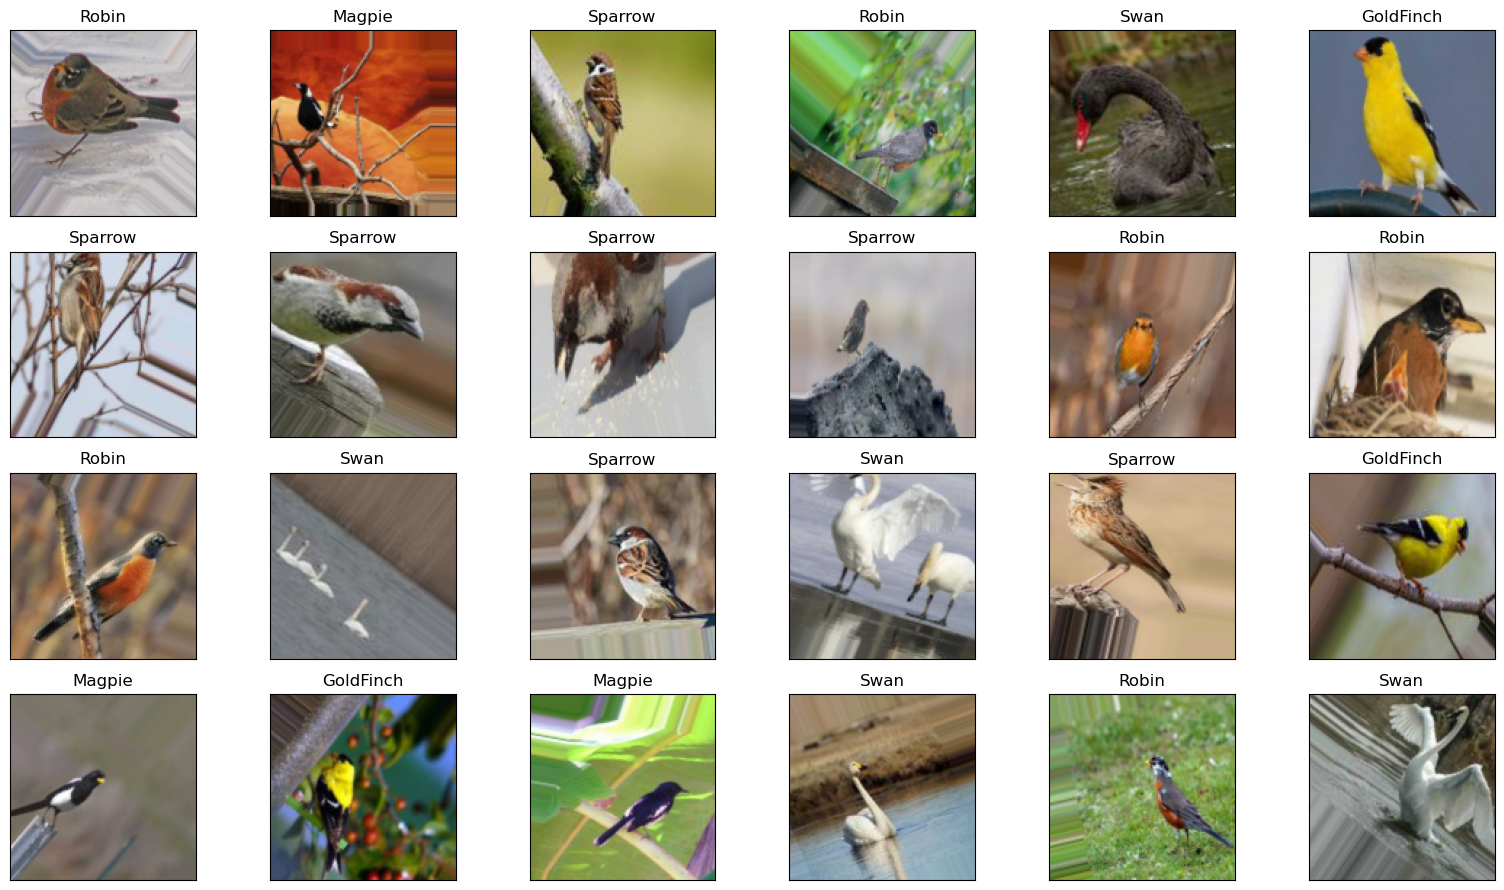

In [8]:
X_batch, y_batch = next(train_generator) 

figure, axes = plt.subplots(nrows=4, ncols=6, figsize=(16, 9))
index = np.random.choice(np.arange(len(X_batch)), 24, replace=False)

for item in zip(axes.ravel(), X_batch[index], y_batch[index]):
    axes, image, target = item
    axes.imshow(image)
    axes.set_xticks([])  # Remove x-axis tick marks
    axes.set_yticks([])  # Remove y-axis tick marks
    
    # Convert one-hot encoded target back to class name
    target_idx = np.argmax(target)  # Find the index of the 1 in the one-hot vector
    bird_name = class_names[target_idx]  # Get the corresponding class name
    
    axes.set_title(bird_name)  # Set the title as the bird name

plt.tight_layout()
plt.show()

### Converting data for neural network training

In [9]:
#Convert training and testing datasets to float32 data types
X_train = X_train.astype("float32")
X_test = X_test.astype("float32")

#Print the range of pixel values, should be between 0.0 and 1.0.
print("X_train range:", X_train.min(), X_train.max())
print("X_test range:", X_test.min(), X_test.max())

X_train range: 0.0 1.0
X_test range: 0.0 1.0


### Neural Network creation (CNN)

This is model I have used, it contains 4 convolutional layers, 4 instances of batch normalization, 2 instances of MaxPooling and some dropouts to reduce overfitting. From numerous attempts at building the model, the model below is the most proficient at identifying key features from the images.

In [ ]:
#Importing necessary tensorflow/keras functions
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import Adam

activation = 'relu' #Defining the activation function
model = Sequential() #Initializing a Sequential model

#First Convolutional layer
model.add(Conv2D(32, 3, activation = activation, padding = 'same', input_shape = (128, 128, 3),
                 kernel_regularizer=regularizers.l2(0.01)))
model.add(BatchNormalization()) #Batch normalisation to normalize the output of the previous layer to improve training stability

#Second Convolutional layer
model.add(Conv2D(32, 3, activation = activation, padding = 'same', kernel_initializer = 'he_uniform',
                 kernel_regularizer=regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(MaxPooling2D()) #Reduce spatial dimensions of feature maps, preserve highest value. Reduces risk of overfitting

#Third Convolutional layer
model.add(Conv2D(64, 3, activation = activation, padding = 'same', kernel_initializer = 'he_uniform',
                 kernel_regularizer=regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(Dropout(0.3)) #Dropout to reduce risk of overfitting by setting 30% of the nodes to zero during training.

#Fourth Convolutional layer
model.add(Conv2D(64, 3, activation = activation, padding = 'same', kernel_initializer = 'he_uniform',
                 kernel_regularizer=regularizers.l2(0.01)))
model.add(BatchNormalization()) 
model.add(MaxPooling2D())

model.add(Flatten()) #Flatten results into a 1D vector
model.add(Dense(128, activation = activation, kernel_initializer = 'he_uniform'))
model.add(Dropout(0.4))
model.add(Dense(5, activation = 'softmax'))

learning_rate = 0.001  #Learning rate for the Adam optimizer 
optimizer = Adam(learning_rate=learning_rate) #Initialize Adam optimizer

model.compile(optimizer = optimizer,loss = 'categorical_crossentropy', metrics = ['accuracy']) #Compiling the model, categorical crossentropy is used for multi-class classification.
print(model.summary()) #Display the summary of the model

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 128, 128, 32)      896       
                                                                 
 batch_normalization_4 (Batc  (None, 128, 128, 32)     128       
 hNormalization)                                                 
                                                                 
 conv2d_5 (Conv2D)           (None, 128, 128, 32)      9248      
                                                                 
 batch_normalization_5 (Batc  (None, 128, 128, 32)     128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 64, 64, 32)       0         
 2D)                                                             
                                                      

### Visualize model

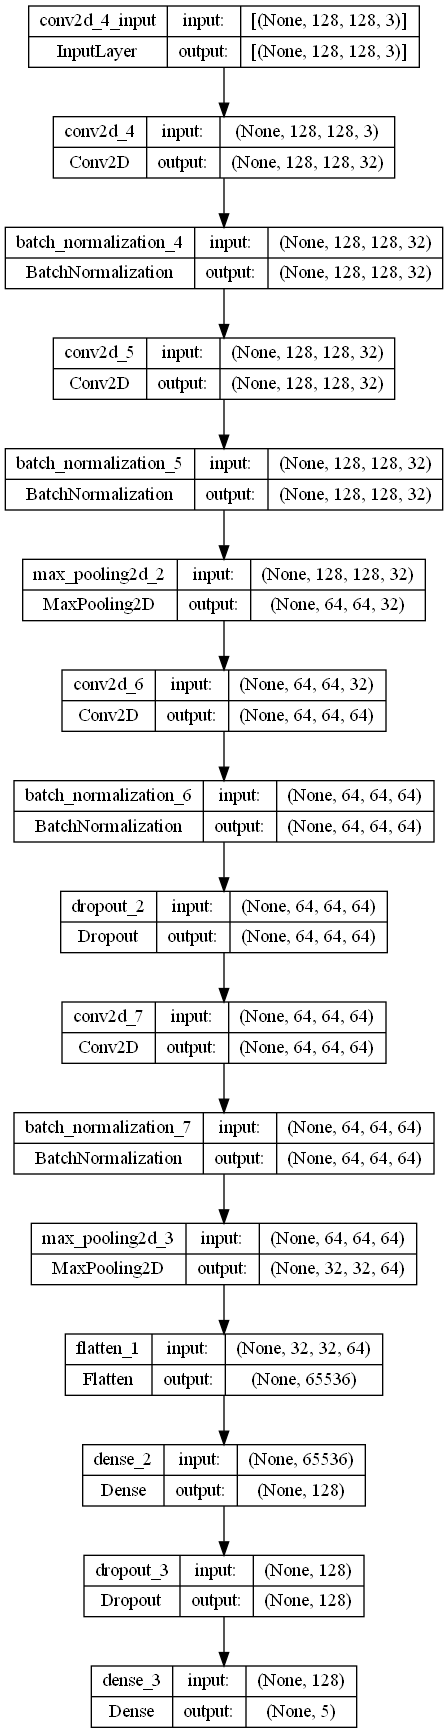

In [57]:
#Importing necessary functions
from tensorflow.keras.utils import plot_model
from IPython.display import Image

#Generates a plot of the model's structure
plot_model(model, to_file='convnet.png', show_shapes=True,
            show_layer_names=True)

#Display the generated image
Image(filename='convnet.png')

### Fitting and Training the model

Next it is time to fit and train the model, this training took around 58 minutes on my system.

In [30]:
history = model.fit(
    X_train, #Features
    y_train, #Labels
    epochs=50, #Number of epochs
    batch_size=batch_size, #Number of samples
    validation_data=(X_test, y_test) #Validation data to evaluate model performance after each epoch
)

Epoch 1/50
66/66 [==============================] - 71s 1s/step - loss: 8.1842 - accuracy: 0.2824 - val_loss: 69.6667 - val_accuracy: 0.1820
Epoch 2/50
66/66 [==============================] - 64s 976ms/step - loss: 4.3928 - accuracy: 0.3614 - val_loss: 58.7148 - val_accuracy: 0.2057
Epoch 3/50
66/66 [==============================] - 65s 983ms/step - loss: 4.0774 - accuracy: 0.3699 - val_loss: 123.0005 - val_accuracy: 0.1820
Epoch 4/50
66/66 [==============================] - 64s 971ms/step - loss: 3.7502 - accuracy: 0.3389 - val_loss: 163.8350 - val_accuracy: 0.1820
Epoch 5/50
66/66 [==============================] - 65s 988ms/step - loss: 3.3549 - accuracy: 0.4140 - val_loss: 27.7798 - val_accuracy: 0.2341
Epoch 6/50
66/66 [==============================] - 65s 980ms/step - loss: 3.0639 - accuracy: 0.4321 - val_loss: 67.8982 - val_accuracy: 0.1934
Epoch 7/50
66/66 [==============================] - 66s 1s/step - loss: 2.7464 - accuracy: 0.4771 - val_loss: 56.6801 - val_accuracy: 0.2

### Plotting training and validation loss

From this graph I can see that the model starts off with considerally high validation loss within the first 10 epochs, this behaviour is common in deep learning models as it is still in the early stages of learning. After the 10th epoch the graph stabilizes showing the model is learning well from unseen data.

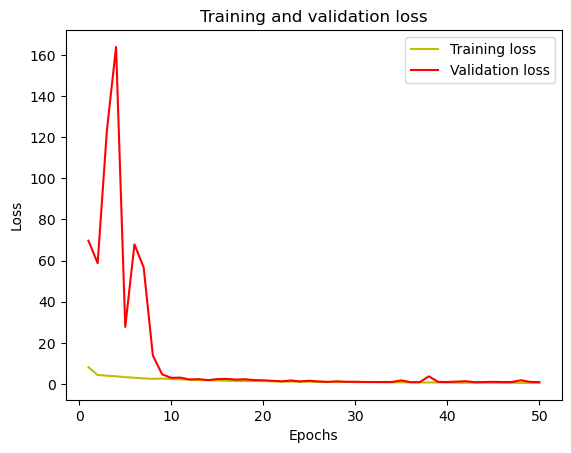

In [ ]:
loss = history.history['loss'] #Getting the training 'loss' from the model history
val_loss = history.history['val_loss'] #Getting the validation 'loss' from the model history
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Plotting training and validation accuracy

From this graph we can see that there are significant improvements in training and validation accuracy over the course of 50 epochs. This increase in accuracy shows that the model is learning more meaningful patterns and generalizing well.

However, there are some large gaps between training accuracy and validation accuracy throughout the graph, consistent large gaps between these two can be seen as a sign of overfitting. However after the 40th epoch we can see that both accuracies begin to stabilize.

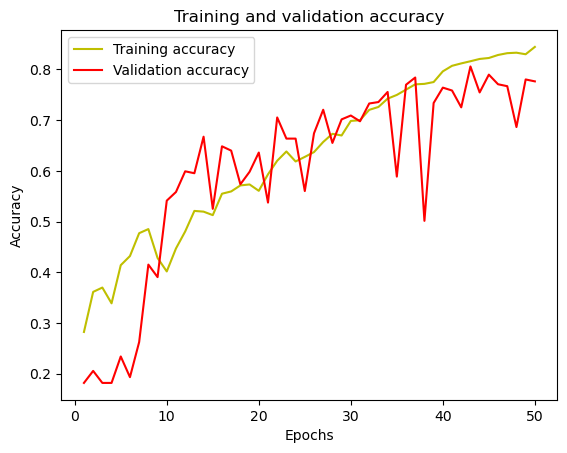

In [ ]:
acc = history.history['accuracy'] #Getting the training 'accuracy' from the model history
val_acc = history.history['val_accuracy'] #Getting the validation 'accuracy' from the model history

plt.plot(epochs, acc, 'y', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy') 
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### Confusion Matrix

This confusion matrix is used to help evaluate the performance of the model on the testing dataset. It provides a detailed breakdown on how well my model is performing on mulit-class classification tasks.

From the errors in the confusion matrix I can see that the model is confusing sparrows with robins, in the future I will supplement this confusion by incorporating convolution layers to the model or add more sparrow images to the dataset in order to help the model distinguish these two species. This confusion between sparrows and robins would explain the large gap between testing accuracy and validation accuracy displayed in the graph above.

33/33 [==============================] - 4s 101ms/step


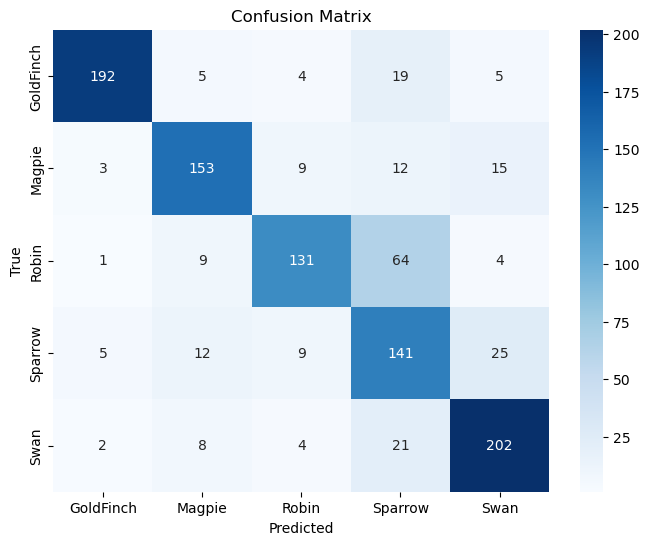

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

#Get model predictions on the testing dataset
y_pred = model.predict(X_test)

#Convert one-hot encoded predictions and true labels to class labels
y_pred_classes = np.argmax(y_pred, axis=1)  #Convert predicted probabilities to class indices
y_true_classes = np.argmax(y_test, axis=1)  #Convert true labels to class indices

#Generate the confusion matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)

#Display the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)#Display results on a heatmap
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


### Making a prediction

Here we will make a prediction on a couple of bird images to see if the model can properly identify them, as well as the top 3 predictions for each image

1/1 [==============================] - 0s 32ms/step


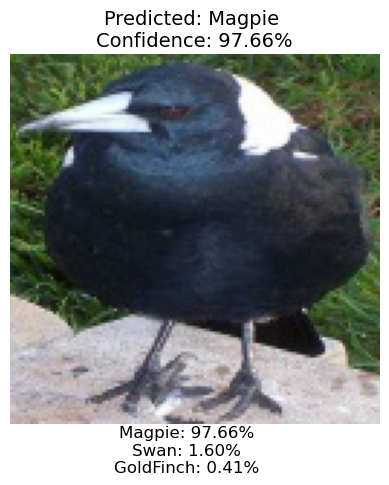

In [38]:
# Load and preprocess the image
img = load_img("pred_img.jpg", target_size=image_size)
img_array = img_to_array(img)  #Convert image to array
img_array = np.expand_dims(img_array, axis=0) # Add batch axis
img_array = img_array / 255.0  #Normalize the image 

#Predict the bird class
predictions = model.predict(img_array)

#Get all the predictions and their respective class names
predicted_indices = np.argsort(predictions[0])[::-1] #Sort the indices based on confidence
predicted_confidences = predictions[0][predicted_indices] * 100 #Convert to percentage

#Top 3 predictions
top_n = 3

#Display the image
plt.imshow(img)
#Hide the axis for better visualization
plt.axis('off')  

#Display the top 3 predictions, including confidence percentage.
prediction_text = "\n".join([f"{class_names[idx]}: {predicted_confidences[i]:.2f}%" for i, idx in enumerate(predicted_indices[:top_n])])

#Display the title of best predicted bird and confidence
plt.title(f"Predicted: {class_names[predicted_indices[0]]} \nConfidence: {predicted_confidences[0]:.2f}%", fontsize=14)
#Display other predictions in a smaller font size and at the bottom of the image
plt.figtext(0.5, 0.01, prediction_text, ha='center', fontsize=12, color='black')  # Display top N predictions
plt.show()

### Saving the model

This saved model will be used in the flask application.

In [ ]:
#Creates a directory to store saved model
!mkdir model
#Save model as a .h5 file
model.save("saved_model/birds.h5")
print("Model saved to 'saved_model/birds.h5'")

A subdirectory or file saved_model already exists.


Model saved to 'saved_model/birds.h5'


### Loading the model

Here we make sure the saved model summary is the same as the one we created earlier.

In [9]:
from tensorflow.keras.models import load_model

#Loads model from directory
loaded_model = load_model("saved_model/birds.h5")

#Display loaded model summary
loaded_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 128, 128, 32)      896       
                                                                 
 batch_normalization_4 (Batc  (None, 128, 128, 32)     128       
 hNormalization)                                                 
                                                                 
 conv2d_5 (Conv2D)           (None, 128, 128, 32)      9248      
                                                                 
 batch_normalization_5 (Batc  (None, 128, 128, 32)     128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 64, 64, 32)       0         
 2D)                                                             
                                                      

### Making a prediction with the loaded model

This is done to ensure that the saving the model and loading the model is working as intended

1/1 [==============================] - 0s 120ms/step


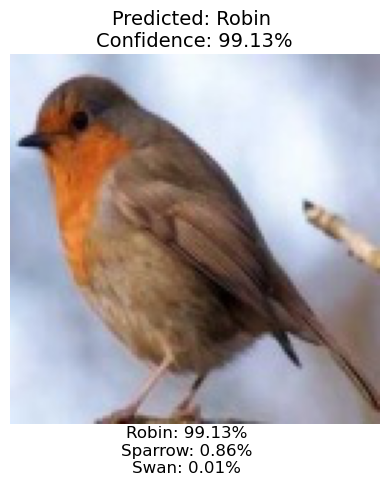

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.models import load_model

#Load the model
model = load_model("saved_model/birds.h5")

#Load and preprocess the image
img = load_img("loaded_pred_img.jpg", target_size=image_size)
img_array = img_to_array(img)  #Convert image to array
img_array = np.expand_dims(img_array, axis=0) # Add batch axis
img_array = img_array / 255.0  #Normalize the image 

#Predict the bird class
predictions = model.predict(img_array)

#Get all the predictions and their respective class names
predicted_indices = np.argsort(predictions[0])[::-1] #Sort the indices based on confidence
predicted_confidences = predictions[0][predicted_indices] * 100 #Convert to percentage

#Top 3 predictions
top_n = 3

#Display the image
plt.imshow(img)
#Hide the axis for better visualization
plt.axis('off')  

#Display the top 3 predictions, including confidence percentage.
prediction_text = "\n".join([f"{class_names[idx]}: {predicted_confidences[i]:.2f}%" for i, idx in enumerate(predicted_indices[:top_n])])

#Display the title of best predicted bird and confidence
plt.title(f"Predicted: {class_names[predicted_indices[0]]} \nConfidence: {predicted_confidences[0]:.2f}%", fontsize=14)
#Display other predictions in a smaller font size and at the bottom of the image
plt.figtext(0.5, 0.01, prediction_text, ha='center', fontsize=12, color='black')  # Display top N predictions
plt.show()

## Used Libraries

+ Python (3.9.18)
+ Tensorflow (2.10.0)
+ Keras (2.10.0)
+ NumPy (2.0.2)
+ Matplotlib (3.9.2)
+ bing_image_installer (For dataset collection)